## 문제 1

### 1.1 PCA의 장점 2가지와 이유를 설명하세요.

In [1]:
# 1. 정보손실을 최소화하면서 차원을 축소시키므로 훈련속도가 기존보다 증가한다. 

# 2. 4차원 이상의 feature들을 3차원 이하로 축소시키면 시각화가 가능해진다. 

## 문제 2  

### [ 신용카드 이용 내역 ]

* `LIMIT_BAL` : 주어진 신용 금액    
  
  
* `PAY_1`~ `PAY6` : 2005년 4월부터 9월까지의 상환 현황  
(ex: __PAY_1__ : 2005년 9월 상환 현황, __PAY_2__ : 2005년 8월 상환 현황)  
(__-1__ : 상환 완료, __0__ : 해당사항 없음, __1__ : 1개월 지연 , __2__ : 2개월 지연 ... __9__ : 9개월 이상 지연)  
  

* `BILL_AMT1` ~ `BILL_AMT6`: 2005년 4월부터 9월까지의 어음계산서 금액  
(ex: __BILL_AMT1__ : 2005년 9월 청구서 금액 , __BILL_AMT2__ : 2005년 8월 청구서 금액)  
  
  
* `PAY_AMT1` ~ `PAY_AMT6` : 2005년 4월부터 9월까지의 이전 결제 금액  
(ex: __PAY_AMT1__ : 2005년 9월에 지급된 금액 , __PAY_AMT2__ : 2005년 8월에 지급된 금액)  

In [1]:
import pandas as pd

In [2]:
# Load Dataset
df = pd.read_excel('credit_card.xls', header = 1, sheet_name = 'Data').iloc[:,1:]

df.rename(columns = {'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace = True)
y_target = df['default']
X_features = df.drop('default', axis = 1)

X_features.shape, y_target.shape

((30000, 23), (30000,))

### 2-1 X_features에 대한 상관관계를 보여주세요

In [3]:
## Use heatmap, fmt='.1g'

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

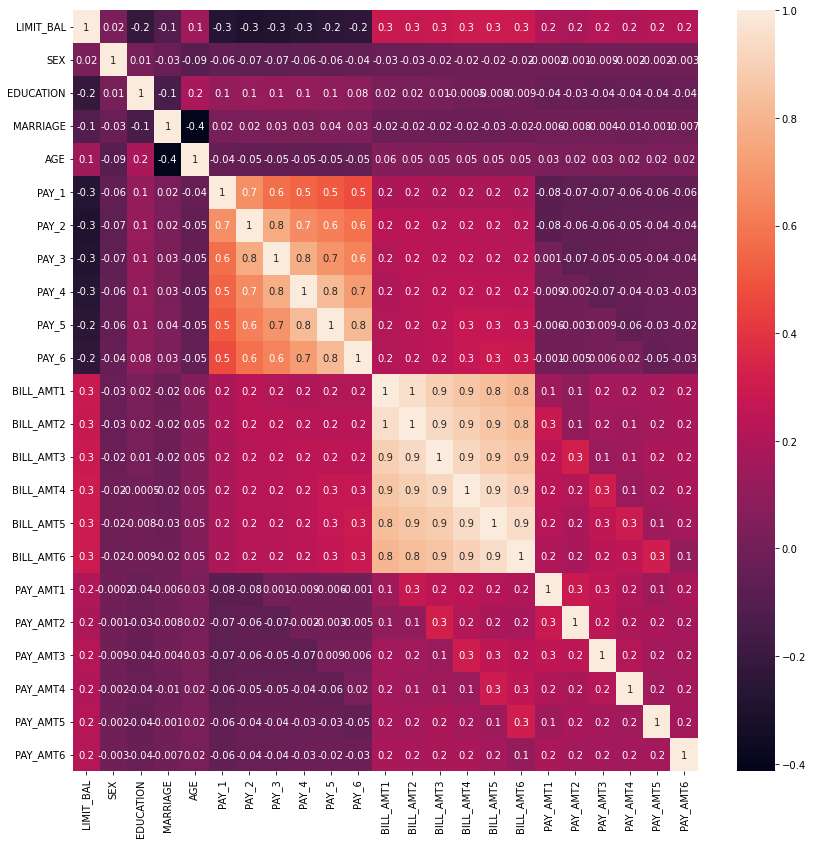

In [14]:
# code here

plt.figure(figsize = (14,14))
sns.heatmap(data=X_features.corr(), annot=True, fmt='.1g')

### 2.2 위의 결과를 보고 PCA를 해야한다면, 어떤 Feature를 적용할 것인지 선택해 설명해주세요. (1개 선택)
  
1. `PAY_1`~ `PAY6`  
  
2. `BILL_AMT1` ~ `BILL_AMT6`  
  
3. `PAY_AMT1` ~ `PAY_AMT6`

In [121]:
# 번호 : 2번

# 이유 : 상관성이 1에 가까운 큰 상관관계를 가지면, 소수의 PCA로 정보손실 최소화 할 수 있다. 

### 2.3 선택한 피쳐를 2개의 속성을 가진 PCA 객체로 생성하고 개별 컴포넌트의 변동성을 확인하세요.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# 코드를 이해하고 본인이 선택한 번호의 피쳐 넣어주세요!
cols_pca = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명 :', cols_pca)

대상 속성명 : ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [11]:
## 2개의 PCA 속성을 가진 PCA 객체를 생성하고 변동성 확인 (StandardScaling 사용)
# code here

scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features[cols_pca])
pca = PCA(n_components=2)
pca.fit(X_features_scaled)
print('PCA Component별 변동성: ',pca.explained_variance_ratio_ )

PCA Component별 변동성:  [0.90555253 0.0509867 ]


### 2.4 PCA를 적용한 결과를 바탕으로 해당 데이터에서 PCA의 효과에 대해 설명하세요.

In [125]:
소수의 PCA로 데이터들의 정보 손실을 최소화 할 수 있다. 정보 손실을 최소화하는 방법으로 feature의 수를 줄일 수 있다.

***

### [ 원본 데이터 VS PCA 적용 데이터 ]

### 2.5 전체 X_feature에 대한 교차검증을 진행하세요. (RandomForest , Accuracy)

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [18]:
## RandomForest 객체 생성 (n_estimators = 300, random_state = 156)
## cv = 3
# code here

clf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(clf, X_features, y_target, scoring='accuracy', cv=3)

print('CV = 3인 경우의 개별 Fold 세트별 정확도 :', scores)
print('평균 정확도 {0:.4f}'.format(np.mean(scores)))

CV = 3인 경우의 개별 Fold 세트별 정확도 : [0.8083 0.8196 0.8232]
평균 정확도 0.8170


### 2.6 PCA를 적용한 후, 주어진 시각화 코드를 출력해 본인이 생각하는 적절한 컴포넌트 값을 찾으세요.

In [29]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA()
df_pca = pca.fit(df_scaled)

In [32]:
np.cumsum(df_pca.explained_variance_ratio_)

array([0.28448215, 0.46267032, 0.53010339, 0.59411493, 0.63869049,
       0.68030786, 0.71976821, 0.75836022, 0.79624063, 0.83028105,
       0.8621414 , 0.89182928, 0.91665313, 0.93945269, 0.95700228,
       0.96830172, 0.97913339, 0.98733735, 0.99306718, 0.99611743,
       0.99789068, 0.99899047, 1.        ])

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


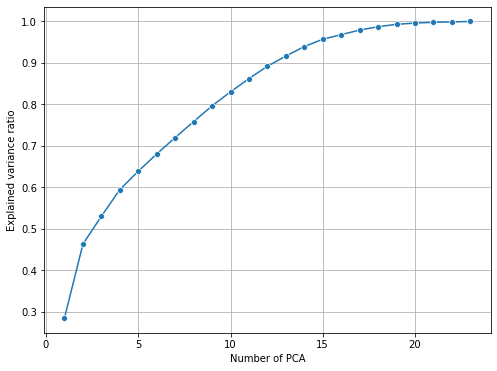

In [30]:
fig ,ax = plt.subplots(1,1, figsize = (8, 6))
sns.lineplot(np.arange(1,df_scaled.shape[1]+1),np.cumsum(df_pca.explained_variance_ratio_), marker = 'o', ax=ax )
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
# 컴포넌트 값 : 10

# 이유 : elbow 포인트를 보았을 때 급격하게 증가가 감소하는 부분을 생각해 보았다. 

### 2.7 위에서 결정한 컴포넌트값을 적용하여 교차검증을 진행하세요. (RandomForest , Accuracy, 위와 동일)

In [63]:
# 원본 데이터 셋에 StandardScaler 적용

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)


# 컴포넌트 적용한 PCA 변환 후 교차검증 진행

pca = PCA(n_components=10)
X_pca = pca.fit_transform(df_scaled)

scores_pca = cross_val_score(clf, X_pca, y_target, scoring='accuracy', cv=3)

print('CV = 3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV = 3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7976 0.7998 0.8058]
PCA 변환 데이터 세트 평균 정확도:0.8011


### 2.8 본인이 선택한 컴포넌트 값이 PCA를 적용하여도 데이터를 잘 설명하고 있는지 설명하세요.

In [ ]:
# 차원을 축소하였는데도 정확도의 차이가 크게 나지 않음으로 데이터를 잘 설명하고 있다고 할 수 있다. 

# 문제 3

### 3.1. LDA 와 QDA의 공통점과 차이점을 서술하시오.

공통점: 베이즈 정리를 이용하여 분류를 수행한다. 

차이점: LDA는 class별로 공분산 구조가 같음을 가정하고, QDA는 class별로 다른 공분산 구조를 갖는다. 

In [43]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import seaborn as sns

In [46]:
### 데이터 셋 불러오기
import pandas as pd
df = pd.read_csv('pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [47]:
df = df[df['Type 2'].isnull()].loc[
    :, ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP', 'Type 1']
]
X = df.iloc[:, :-1].values

from sklearn.preprocessing import normalize
X_norm = normalize(X)

y = df.iloc[:, -1].values

In [48]:
df.head()

,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP,Type 1
4,52,43,60,50,65,39,Fire
5,64,58,80,65,80,58,Fire
9,48,65,50,64,43,44,Water
10,63,80,65,80,58,59,Water
11,83,100,85,105,78,79,Water


### 3.2. 새로운 데이터셋으로, 변수들 관 상관관계를 파악해주세요. (heatmap 사용)

<AxesSubplot:>

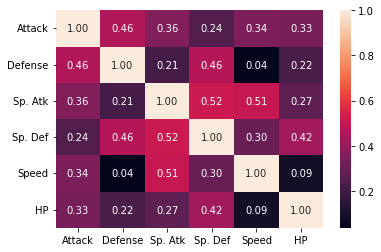

In [53]:
#write code here

sns.heatmap(data=df.corr(), annot=True, fmt='.2f')

### 3.3. Feature/Target을 지정 후, Train/Test 데이터를 나눕니다. (test size = .2, random_state = 50)

In [54]:
import seaborn as sns
#write code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

### 3.4. LDA를 적용한 후, 평가 과정을 거쳐 정확도를 구해주세요.

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# code here (n_compenents = 3)
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

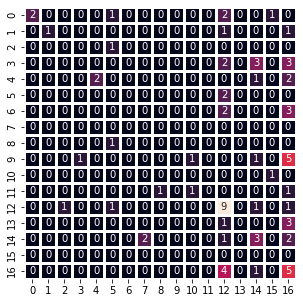

In [56]:
cm = confusion_matrix(y_test, y_pred_lda)
ax = plt.subplots(figsize = (5, 5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar = False, square = True, annot = True, fmt = 'g',
               linewidths = 2.5)    

In [57]:
round(accuracy_score(y_test, y_pred_lda), 4)

0.2821

In [58]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

         Bug       1.00      0.33      0.50         6
        Dark       1.00      0.33      0.50         3
      Dragon       0.00      0.00      0.00         1
    Electric       0.00      0.00      0.00         8
       Fairy       1.00      0.40      0.57         5
    Fighting       0.00      0.00      0.00         2
        Fire       0.00      0.00      0.00         5
      Flying       0.00      0.00      0.00         0
       Ghost       0.00      0.00      0.00         1
       Grass       0.00      0.00      0.00         8
      Ground       0.00      0.00      0.00         1
         Ice       0.00      0.00      0.00         3
      Normal       0.38      0.69      0.49        13
      Poison       0.00      0.00      0.00         4
     Psychic       0.30      0.38      0.33         8
        Rock       0.00      0.00      0.00         0
       Water       0.19      0.50      0.28        10

    accuracy              

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Rec

### 3.6  QDA를 적용한 후, 평가 과정을 거쳐 정확도를 구해주세요.

In [59]:
qda = QuadraticDiscriminantAnalysis()
#fill your code in
model_qda = qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


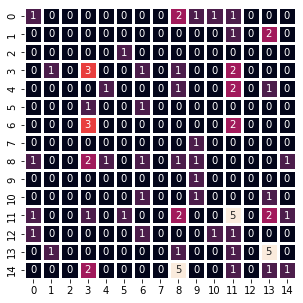

In [60]:
cm = confusion_matrix(y_test, y_pred_qda)
ax = plt.subplots(figsize = (5, 5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar = False, square = True, annot = True, fmt = 'g',
               linewidths = 2.5)
                   

In [61]:
round(accuracy_score(y_test, y_pred_qda), 4)

0.2308

In [62]:
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

         Bug       0.25      0.17      0.20         6
        Dark       0.00      0.00      0.00         3
      Dragon       0.00      0.00      0.00         1
    Electric       0.25      0.38      0.30         8
       Fairy       0.50      0.20      0.29         5
    Fighting       0.00      0.00      0.00         2
        Fire       0.00      0.00      0.00         5
       Ghost       0.00      0.00      0.00         1
       Grass       0.08      0.12      0.10         8
      Ground       0.20      1.00      0.33         1
         Ice       0.00      0.00      0.00         3
      Normal       0.31      0.38      0.34        13
      Poison       0.00      0.00      0.00         4
     Psychic       0.42      0.62      0.50         8
       Water       0.33      0.10      0.15        10

    accuracy                           0.23        78
   macro avg       0.16      0.20      0.15        78
weighted avg       0.22   

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.7 LDA와 QDA 중 어떤 방법이 더 정확도가 높나요? 방법을 골라주시고, 데이터셋의 특징을 사용하여 그 이유도 같이 서술해주세요.

이유: LDA가 정확도가 더 높다. 